In [2]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import fitsio
import sys, os, time, argparse, glob
import warnings; warnings.simplefilter('ignore')

sys.path.insert(0, '/global/homes/q/qmxp55/DESI/shared/desitarget/')
from targetmask import desi_mask

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

import matplotlib
matplotlib.rc('font', **font)

# Load desitarget catalogue

This will load my copy of desitarget catalogue generated on 5th February 2019. 
The catalogue is stored here:

        /global/homes/q/qmxp55/DESI/desitarget_data/targetdir/targets-dr7.1-0.26.0.fits

In [3]:
targdir = '/global/homes/q/qmxp55/DESI/desitarget_data/targetdir'

In [4]:
df = fitsio.read(os.path.join(targdir, 'targets-dr7.1-0.26.0.fits'))

To check the columns of the catalogue run:
    
        df.dtype.names
        
To mask for ELG targets and BRIGHTSTARINBLOB, you need to look into 'BRIGHTSTARINBLOB' and 'DESI_TARGET' columns but also, it's necesary to load 'desi_mask' which contains the information of the bits asociated to all Dark time targets in the 'DESI_TARGET' column. This module can be load with the followiing lines:

    sys.path.insert(0, '/global/homes/q/qmxp55/DESI/shared/desitarget/')
    from targetmask import desi_mask

'desi_mask' was already loaded at the top of this notebook. 

Below is an example of how to extract the ELG targets.

In [8]:
#creating an array of booleans with the same length as desitarget catalogue
primary = np.ones_like(df['RA'], dtype='?') 

ELG = primary.copy()
BRIBLOB = primary.copy()
#Filling the boolean array with ELG targets only as TRUE.
ELG &= (np.uint64(df['DESI_TARGET']) & np.uint64(desi_mask['ELG']))!=0
#Filling the boolean array with BRIGHTSTARINBLOB
BRIBLOB &= df['BRIGHTSTARINBLOB']

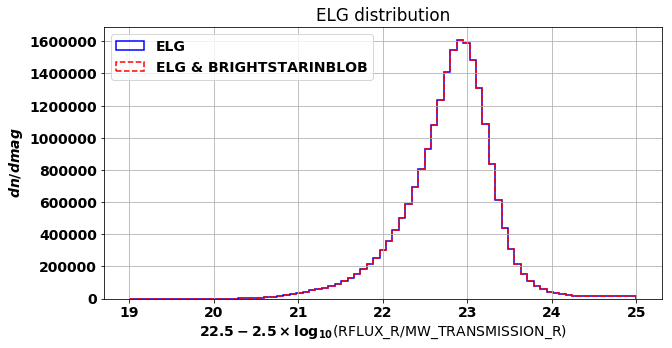

In [14]:
def flux_to_mag(flux):
    mag = 22.5 - 2.5*np.log10(flux)
    return mag

plt.figure(figsize=(10, 5))

rmag = flux_to_mag(df['FLUX_R']/df['MW_TRANSMISSION_R'])

bins1 = np.linspace(19, 25, 80)

c1 = plt.hist(rmag[ELG], bins=bins1, cumulative=False, histtype='step', align='mid', 
        color='blue', linewidth=1.5, label=r'ELG')

c2 = plt.hist(rmag[(ELG) & (~BRIBLOB)], bins=bins1, cumulative=False, histtype='step', align='mid', 
        color='r', linewidth=1.5, linestyle='--', label=r'ELG & BRIGHTSTARINBLOB')

plt.legend(loc='upper left')

plt.xlabel(r'$22.5 - 2.5\times \log_{10}$(%s/%s)' %('RFLUX_R', 'MW_TRANSMISSION_R'))
plt.ylabel(r'$dn/dmag$')
plt.title(r'ELG distribution')
plt.grid()

plt.show()

# Load the randoms

Example of randoms and how to mask BRIGHTSTARINBLOB.

In [15]:
randoms=fitsio.read('/project/projectdirs/desi/target/catalogs/dr7.1/0.22.0/randoms-dr7.1-0.22.0-1.fits')

In [17]:
ran_briblob = np.ones_like(randoms, dtype='?')
#Masking the BRIGHTSTARINBLOB of randoms
ran_briblob &= (np.uint64(randoms['MASKBITS']) & np.uint64(0x2))!=0

In [18]:
print('%2.2g %% of randoms are in BRIGHTSTARINBLOB' %(np.sum(ran_briblob)*100/len(randoms)))

1.1 % of randoms are in BRIGHTSTARINBLOB
